In [2]:
import pandas as pd


arquivo = ('alunos_ian.csv')
df = pd.read_csv(arquivo)


1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.

In [3]:

print("A quantidade de alunos do sexo masculino é:",(df['Sexo']=='Masculino').sum(),"\nO que representa",(df['Sexo']=='Masculino').sum()/df['Sexo'].count()*100,"%")
print("A quantidade de alunos do sexo feminino é:",(df['Sexo']=='Feminino').sum(), "\nO que representa",(df['Sexo']=='Feminino').sum()/df['Sexo'].count()*100,"%")

A quantidade de alunos do sexo masculino é: 494 
O que representa 49.4 %
A quantidade de alunos do sexo feminino é: 506 
O que representa 50.6 %


2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [4]:
media_por_idade = df.groupby('Idade')['Nota_ENEM'].mean()
media_por_idade

Idade
18    714.606742
19    723.123711
20    711.523256
21    709.301205
22    716.081633
23    724.213483
24    722.468085
25    717.365591
26    730.752475
27    721.071429
28    720.023256
Name: Nota_ENEM, dtype: float64

3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [7]:
min_nota_enem = df['Nota_ENEM'].min()
max_nota_enem = df['Nota_ENEM'].max()
df['Nota ENEM Normalizada'] = 5 + ((df['Nota_ENEM'] - min_nota_enem) / (max_nota_enem - min_nota_enem)) * 5
display(df[['Nota_ENEM', 'Nota ENEM Normalizada']])


,Nota_ENEM,Nota ENEM Normalizada
0,657,5.53125
1,667,5.84375
2,698,6.81250
3,679,6.21875
4,729,7.78125
...,...,...
995,669,5.90625
996,671,5.96875
997,648,5.25000
998,696,6.75000


10.0


4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.   

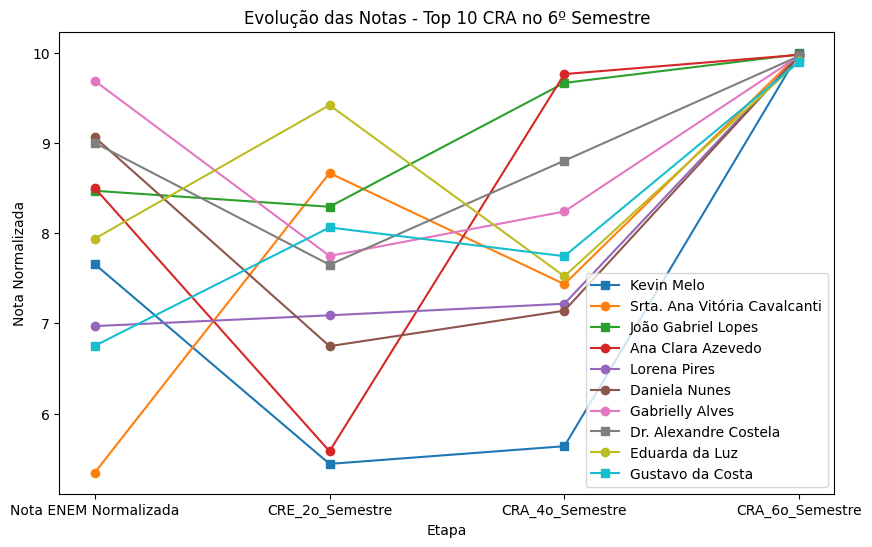

In [9]:
import matplotlib.pyplot as plt

top_10_cra_sexto = df.nlargest(10, 'CRA_6o_Semestre')
markers = {'Masculino': 's', 'Feminino': 'o'}

plt.figure(figsize=(10, 6))
for index, row in top_10_cra_sexto.iterrows():
    marker = markers[row['Sexo']]
    plt.plot(['Nota ENEM Normalizada', 'CRE_2o_Semestre', 'CRA_4o_Semestre', 'CRA_6o_Semestre'],
             [row['Nota ENEM Normalizada'], row['CRE_2o_Semestre'], row['CRA_4o_Semestre'], row['CRA_6o_Semestre']],
             marker=marker, label=row['Nome'])

plt.title('Evolução das Notas - Top 10 CRA no 6º Semestre')
plt.xlabel('Etapa')
plt.ylabel('Nota Normalizada')
plt.legend()
plt.show()